# IMDB Movie Reviews - Natural Langauge Processing

## Goal : To perform sentiment analysis using natural language processing on Movie reviews

### About the dataset
The labeled data set consists of 25,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1.

### NLP Pipeline
* Importing required libraries
* Loading/Importing the dataset
* Data Exploration
* Natural Language Processing using NLTK
    * Removing non-letter characters
    * Tokenizing
    * Stemming
    * Removing stop words
* Creating BOW model
* Creating Tf-Idf Model
* Model Comparison/Interpreting the results

### - Importing required libraries

In [20]:
import numpy as np
import pandas as pd
#text cleaning
import re
#NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### - Loading/Importing the dataset
We will first load the dataset as shown under

In [2]:
data = pd.read_csv(r'C:\Users\aashi\Desktop\Data Science\datasets\NLP - IMDB movie reviews\labeledTrainData.tsv', delimiter = '\t', quoting = 3)

### - Data Exploration

In [3]:
#shape of data and reading the first 3 rows
data.shape

(25000, 3)

the training data has 3 variables and 25,000 observations

In [4]:
#reading first 3 rows
data.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [5]:
#missing values
data.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [6]:
#count by classes
print(data['sentiment'].value_counts())

1    12500
0    12500
Name: sentiment, dtype: int64


### - Natural Language Processing using NLTK

In [7]:
clean_data = []
for i in range(0, 25000):
    #removing non-letter character
    review = re.sub('[^a-zA-Z]',' ', data['review'][i])
    #converting to lower case letters
    review = review.lower()
    #tokenizing senetences/phrases
    #we will first split the review into words as each review is in a string format right now
    review = word_tokenize(review)
    #stemming
    ps = PorterStemmer()
    #creating for loop to remove stop words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #converting the review back to a string format
    review = ' '.join(review)
    clean_data.append(review)

### - Creating BOW model

In [8]:
#creating a Count vectorizer object for BOW model
cv = CountVectorizer(max_features = 5000)

In [9]:
#creating dataframes from target variable and features
X = cv.fit_transform(clean_data).toarray()
y = data['sentiment'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### - Model Development

We will now move on to the sentiment analysis phase where we implement several machine learning models to predict the sentiment of the movie reviews from the test data and also compare the results of the different models. 
For the purpose of this project we will be building and evaluating the following models

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

#### 1. Logistic Regression

In [13]:
#MODEL TRAINING

#importing library for logistic regression
from sklearn.linear_model import LogisticRegression

#create a logistic regression classifier
logreg = LogisticRegression()

#training the model on the training set
logreg.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [17]:
#calculating the accuracy, precision and the recall
acc_logreg = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
pre_logreg = round(metrics.precision_score(y_test, y_pred)*100,2)
rec_logreg = round(metrics.recall_score(y_test, y_pred)*100, 2)
print('Total Accuracy: ', acc_logreg)
print('Precision: ', pre_logreg)
print('Recall: ', rec_logreg)

Total Accuracy:  85.5
Precision:  84.72
Recall:  85.93


In [18]:
#creating confusion matrix
from sklearn.metrics import auc,confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

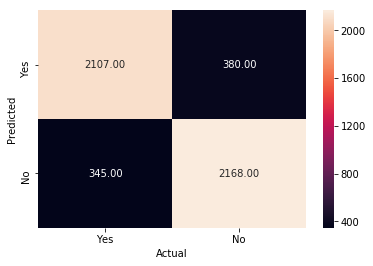

In [21]:
draw_cm(y_test, y_pred)

#### 2. Decision Tree Classifier

In [22]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# Prediction on test set
y_pred = clf.predict(X_test)

In [24]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_dt = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_dt = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )
print( 'Precision : ',pre_dt  )
print( 'Recall : ',rec_dt  )

Total Accuracy :  71.38
Precision :  70.97
Recall :  70.47


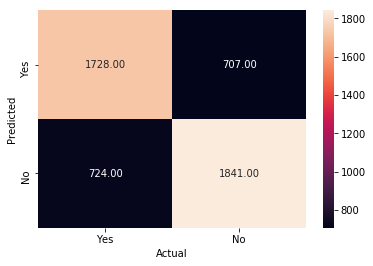

In [25]:
# Confusion matrix
draw_cm(y_test, y_pred)

#### 3. Random Forest Classifier

In [26]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [28]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
pre_rf = round( metrics.precision_score(y_test, y_pred) * 100 , 2 )
rec_rf = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_rf )
print( 'Precision : ',pre_rf )
print( 'Recall : ',  rec_rf)

Total Accuracy :  77.08
Precision :  80.29
Recall :  70.6


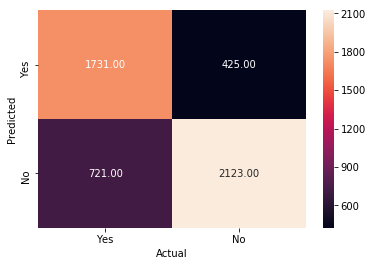

In [29]:
# Confusion metrix
draw_cm(y_test, y_pred)

### - Creating Tf-Idf Model

In [30]:
#creating an object for Tf-idf model
tfidf = TfidfVectorizer()

In [31]:
#creating dataframes from target variable and features
X2 = tfidf.fit_transform(clean_data).toarray()
y = data['sentiment'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20, random_state = 0)

We will now move on to the classification phase where we implement several machine learning models to predict the sentiment of the movie reviews based on the Tf_idf model this time and also compare the results of the different models. 
For the purpose of this project we will be building and evaluating the following models

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

#### 1. Logistic Regression

In [37]:
#MODEL TRAINING

#importing library for logistic regression
from sklearn.linear_model import LogisticRegression

#create a logistic regression classifier
logreg2 = LogisticRegression()

#training the model on the training set
logreg2.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Prediction on test data
y_pred = logreg2.predict(X_test)

In [39]:
#calculating the accuracy, precision and the recall
acc_logreg2 = round(metrics.accuracy_score(y_test, y_pred)*100, 2)
pre_logreg2 = round(metrics.precision_score(y_test, y_pred)*100,2)
rec_logreg2 = round(metrics.recall_score(y_test, y_pred)*100, 2)
print('Total Accuracy: ', acc_logreg2)
print('Precision: ', pre_logreg2)
print('Recall: ', rec_logreg2)

Total Accuracy:  89.24
Precision:  87.92
Recall:  90.5


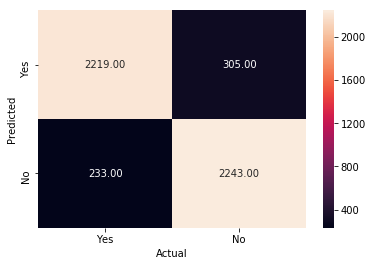

In [40]:
draw_cm(y_test, y_pred)

#### 2. Decision Tree Classifer

In [41]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf2 = DecisionTreeClassifier()

# Train the model using the training sets 
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
# Prediction on test set
y_pred = clf2.predict(X_test)

In [43]:
# Calculating the accuracy, precision and the recall
acc_dt2 = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
pre_dt2 = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
rec_dt2 = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt2 )
print( 'Precision : ',pre_dt2  )
print( 'Recall : ',rec_dt2  )

Total Accuracy :  71.3
Precision :  70.68
Recall :  70.88


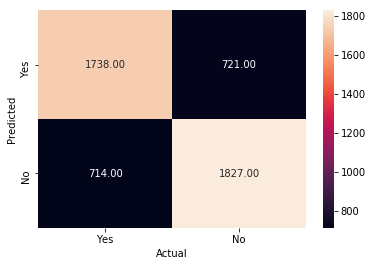

In [44]:
# Confusion matrix
draw_cm(y_test, y_pred)

#### 3. Random Forest Classifier

In [45]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf2 = RandomForestClassifier()

# Train the model using the training sets 
rf2.fit(X_train,y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
# Prediction on test data
y_pred = rf2.predict(X_test)

In [47]:
# Calculating the accuracy, precision and the recall
acc_rf2 = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
pre_rf2 = round( metrics.precision_score(y_test, y_pred) * 100 , 2 )
rec_rf2 = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_rf2 )
print( 'Precision : ',pre_rf2 )
print( 'Recall : ',  rec_rf2)

Total Accuracy :  75.94
Precision :  80.1
Recall :  67.78


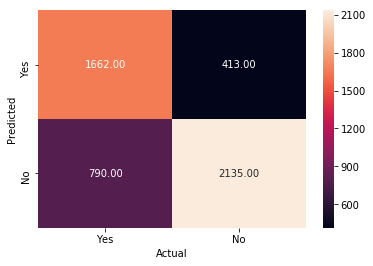

In [48]:
# Confusion metrix
draw_cm(y_test, y_pred)

### - Model Comparison/Interpreting the results

In [51]:
models = pd.DataFrame({
    'Model' : ['Bag of Words', 'Bag of Words', 'Bag of Words', 'Tf-Idf','Tf-Idf','Tf-Idf'],
    'Classifier': ['Logistic Regression', 'Decision Tree', 'Random Forest' ,
             'Logistic Regression', 'Decision Tree', 'Random Forest' ],
    'Score': [acc_logreg, acc_dt, acc_rf,acc_logreg2, acc_dt2, acc_rf2]})
models.sort_values(by= 'Score', ascending=False)

,Model,Classifier,Score
3,Tf-Idf,Logistic Regression,89.24
0,Bag of Words,Logistic Regression,85.50
2,Bag of Words,Random Forest,77.08
5,Tf-Idf,Random Forest,75.94
1,Bag of Words,Decision Tree,71.38
4,Tf-Idf,Decision Tree,71.30


We can see from the above table that Logistic Regression classifier with Tf-idf model gives the highest accuracy

# THE END